## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
finaldata_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

In [2]:
final_df = finaldata_df.set_index("Drug Regimen")
regimen= finaldata_df["Drug Regimen"].value_counts()
count_df = pd.DataFrame(regimen)

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = finaldata_df[["Drug Regimen", "Tumor Volume (mm3)"]] 
mean= tumor_volume.groupby(['Drug Regimen']).mean()
median = tumor_volume.groupby(['Drug Regimen']).median()
variance = tumor_volume.groupby(['Drug Regimen']).var()
sd = tumor_volume.groupby(['Drug Regimen']).std()
SEM = tumor_volume.groupby(['Drug Regimen']).sem()

merged_a = pd.merge(mean, median, on = "Drug Regimen", suffixes=('_mean', '_median'))
merged_b = pd.merge(merged_a, variance, on = "Drug Regimen")
merged_c = pd.merge(merged_b, sd, on = "Drug Regimen", suffixes=('_variance', '_sd'))
merged_d = pd.merge(merged_c, SEM, on = "Drug Regimen")
summary_table = merged_d.rename(columns={"Tumor Volume (mm3)_mean":"Tumor Volume (Mean)", 
                                         "Tumor Volume (mm3)_median": "Tumor Volume (Median)",
                                         "Tumor Volume (mm3)_variance": "Tumor Volume (Variance)",
                                        "Tumor Volume (mm3)_sd": "Tumor Volume (Std. deviation)",
                                        "Tumor Volume (mm3)": "Tumor Volume (SEM)"})
summary_table


Tumor Volume (Mean)  Tumor Volume (Median)  \
Drug Regimen                                               
Capomulin               40.675741              41.557809   
Ceftamin                52.591172              51.776157   
Infubinol               52.884795              51.820584   
Ketapril                55.235638              53.698743   
Naftisol                54.331565              52.509285   
Placebo                 54.033581              52.288934   
Propriva                52.322552              50.854632   
Ramicane                40.216745              40.673236   
Stelasyn                54.233149              52.431737   
Zoniferol               53.236507              51.818479   

              Tumor Volume (Variance)  Tumor Volume (Std. deviation)  \
Drug Regimen                                                           
Capomulin                   24.947764                       4.994774   
Ceftamin                    39.290177                       6.268188   
Infubinol                   43.128684                       6.567243   
Ketapril                    68.553577                       8.279709   
Naftisol                    66.173479                       8.134708   
Placebo                     61.168083                       7.821003   
Propriva                    42.351070                       6.507770   
Ramicane                    23.486704                       4.846308   
Stelasyn                    59.450562                       7.710419   
Zoniferol                   48.533355                       6.966589   

              Tumor Volume (SEM)  
Drug Regimen                      
Capomulin               0.329346  
Ceftamin                0.469821  
Infubinol               0.492236  
Ketapril                0.603860  
Naftisol                0.596466  
Placebo                 0.581331  
Propriva                0.512884  
Ramicane                0.320955  
Stelasyn                0.573111  
Zoniferol               0.516398

## Bar plots

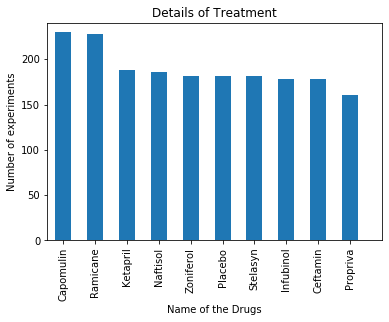

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_chart = regimen.plot(kind="bar")
count_chart.set_xlabel("Name of the Drugs")
count_chart.set_ylabel("Number of experiments")

plt.title("Details of Treatment")
plt.xlim(-0.50, len(regimen))
plt.ylim(0, max(count_df["Drug Regimen"])+10)
plt.show()
plt.tight_layout()

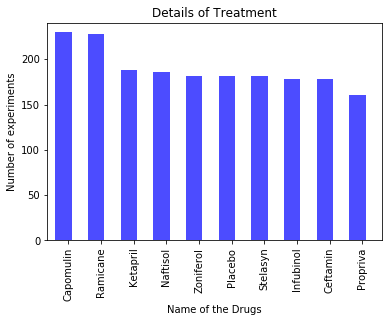

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(count_df))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, count_df["Drug Regimen"], width = 0.5, color='b', alpha = 0.7, align="edge")
plt.xticks(tick_locations,["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(count_df["Drug Regimen"])+10)

plt.title("Details of Treatment")
plt.xlabel("Name of the Drugs")
plt.ylabel("Number of experiments")

plt.show()
plt.tight_layout()

## Pie plots

In [6]:
gender = finaldata_df.groupby("Sex").count()
gender["Mouse ID"]

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

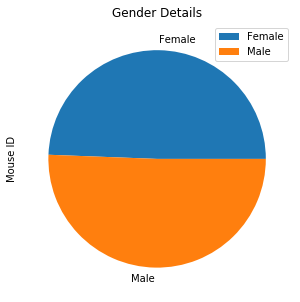

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(gender["Mouse ID"])
gender_df.plot.pie(y='Mouse ID', figsize=(5, 5), title= "Gender Details")

(-1.141153604347767,
 1.1356431801525912,
 -1.2079013370578193,
 1.1374921859964344)

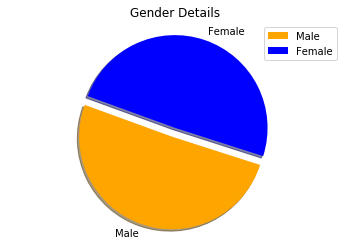

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Male", "Female"]
sizes = ["958", "935"]
color = ["orange", "blue"]
explode = [0.1,0]

plt.title("Gender Details")
plt.pie(sizes, explode=explode, labels=label, colors=color, shadow=True, startangle=160)
plt.legend(loc=1)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
last_value= final_df.drop_duplicates(subset='Mouse ID', keep='last')
df_cap = last_value.loc[["Capomulin"]]
df_cef = last_value.loc[["Ceftamin"]]
df_i = last_value.loc[["Infubinol"]]
df_r = last_value.loc[["Ramicane"]]
df_cap_1=df_cap["Tumor Volume (mm3)"]
df_cef_1=df_cef["Tumor Volume (mm3)"]
df_i_1=df_i["Tumor Volume (mm3)"]
df_r_1=df_r["Tumor Volume (mm3)"]
total_vol = [df_cap_1,df_cef_1,df_i_1,df_r_1]

#Capomulin Quartile
quartiles = df_cap_1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The the median of Capomulin tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")
print("----------------------------------------------------------------")

#Ceftamin Quartile
quartiles = df_cef_1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The the median of Ceftamin tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")
print("----------------------------------------------------------------")

#Infubinol Quartile
quartiles = df_i_1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The the median of Infubinol tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")
print("----------------------------------------------------------------")

#Ramicane Quartile
quartiles = df_r_1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The the median of Ramicane tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 mm3 could be outliers.
Values above 51.83201549 mm3 could be outliers.
----------------------------------------------------------------
The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The the median of Ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 mm3 could be outliers.
Values above 87.66645829999999 mm3 could be outliers.
----------------------------------------------------------------
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Inf

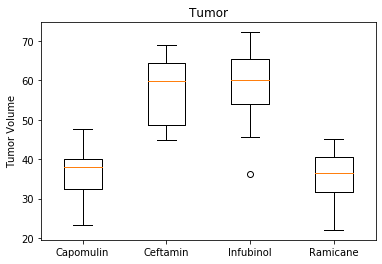

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(total_vol)
plt.xticks([1,2,3,4],["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
plt.show()

## Line and scatter plots

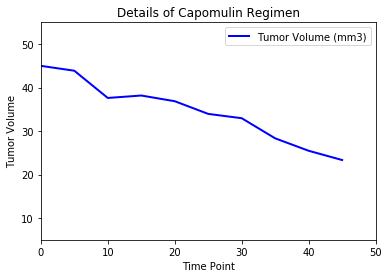

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
only_capomul = finaldata_df.loc[finaldata_df["Drug Regimen"]=="Capomulin",:]
mouse_df = only_capomul.loc[only_capomul["Mouse ID"] == "s185"]
mouse_df = mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

Mouseplot = mouse_df.set_index('Timepoint').plot(linewidth=2.0, color="blue", title = "Tumor volume over time under Capomulin")
Mouseplot.set_xlabel("Time Point")
Mouseplot.set_ylabel("Tumor Volume")
plt.title("Details of Capomulin Regimen")


plt.show()

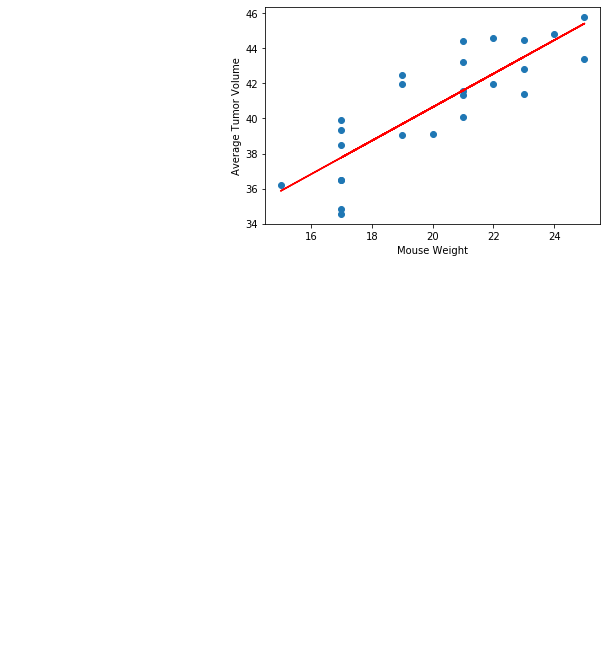

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
reduced_df = only_capomul.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

avg_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap = avg_cap.set_index('Mouse ID')
mouse_weight = avg_cap.iloc[:,0]
avg_tumor_volume = avg_cap.iloc[:,1]

x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [39]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [19]:
#Observations
print(f"Observations: Comapred to other regimens, experiments in Capomulin & Ramicane were more in numbers. Equal number of male & female mouses were observed. Positive co-relation between Avg tumor volume & Mouse weight was observed during study.")         

Observations: Comapred to other regimens, experiments in Capomulin & Ramicane were more in numbers. Equal number of male & female mouses were observed. Positive co-relation between Avg tumor volume & Mouse weight was observed during study.
